In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('train_FD001.txt', sep= " ", header=None)
print(df.shape)

(20631, 28)


In [3]:
#naming the columns
#1. column - unit_number, 2. column - cycle (time, in cycles)
#3-5 columns - op_set_ (operational settings), 6-26 columns - sensor (sensor measurement) 
op_set_column_names = ['op_set_' + str(i) for i in range (1,4)]
sensor_column_names = ['sensor' + str(i) for i in range (1,24)]
column_names = ['unit_number'] + ['cycle'] + op_set_column_names + sensor_column_names

df.columns = column_names

In [4]:
#calculation of RUL(Remaining Useful Life)
#RUL at the beginning for each unit is equal to its maximum cycle
#RUL decreases by 1 with each cycle until it reaches 0 - then the machine breaks down
list_of_rul = []
rul = df.groupby('unit_number')['cycle'].max().reset_index()
for u in rul['unit_number']:
    r = int(rul[rul['unit_number']==u]['cycle'])
    while(r > 0):
        r -= 1
        list_of_rul.append(r) 
        
df['RUL'] = list_of_rul

In [5]:
df.head(3)

,unit_number,cycle,op_set_1,op_set_2,op_set_3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189


# Exploratory Data Analysis

In [6]:
#checking for missing values
df.isna().sum()

unit_number        0
cycle              0
op_set_1           0
op_set_2           0
op_set_3           0
sensor1            0
sensor2            0
sensor3            0
sensor4            0
sensor5            0
sensor6            0
sensor7            0
sensor8            0
sensor9            0
sensor10           0
sensor11           0
sensor12           0
sensor13           0
sensor14           0
sensor15           0
sensor16           0
sensor17           0
sensor18           0
sensor19           0
sensor20           0
sensor21           0
sensor22       20631
sensor23       20631
RUL                0
dtype: int64

In [7]:
#rejection of columns: sensor22 and sensor23
df.drop(columns=['sensor22','sensor23'], inplace = True)

In [8]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_set_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_set_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_set_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


Text(0.5, 1.0, 'sensor16')

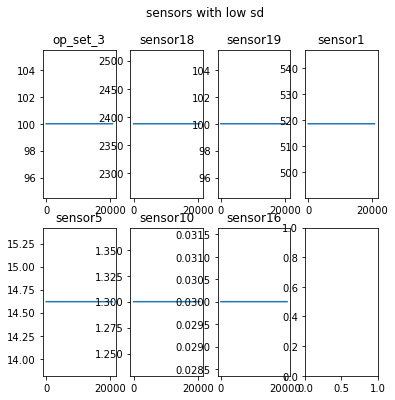

In [9]:
fig, axs = plt.subplots(2,4, figsize=(6,6))
fig.suptitle('sensors with low sd')
axs[0,0].plot(df['op_set_3'])
axs[0,0].set_title('op_set_3')
axs[0,1].plot(df['sensor18'])
axs[0,1].set_title('sensor18')
axs[0,2].plot(df['sensor19'])
axs[0,2].set_title('sensor19')
axs[0,3].plot(df['sensor1'])
axs[0,3].set_title('sensor1')
axs[1,0].plot(df['sensor5'])
axs[1,0].set_title('sensor5')
axs[1,1].plot(df['sensor10'])
axs[1,1].set_title('sensor10')
axs[1,2].plot(df['sensor16'])
axs[1,2].set_title('sensor16')

In [10]:
#rejection of variables with the lowest standard deviation 
column_to_drop = ['op_set_3', 'sensor1', 'sensor5','sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19']
df.drop(column_to_drop, axis=1, inplace=True)

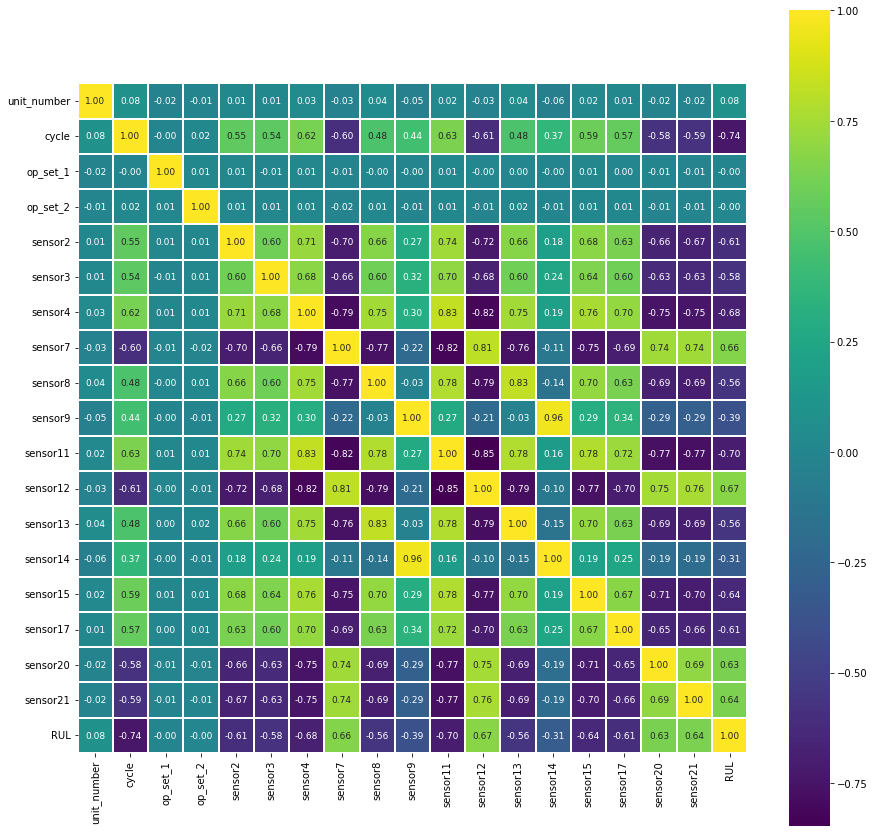

In [11]:
#macierz korelacji
df_corr = df.corr()

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True 


corr_plot = sns.heatmap(df_corr, annot = True, annot_kws={"size":9}, fmt= '0.2f', cmap = 'viridis', linewidths = 0.2, square = True)

fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

fig = corr_plot.get_figure()

In [12]:
#op_set_1 and op_set_2 are not correlated with the variable RUL
#most strongly correlated explanatory variables: sensor14 and sensor9 

In [13]:
#distribution of variables

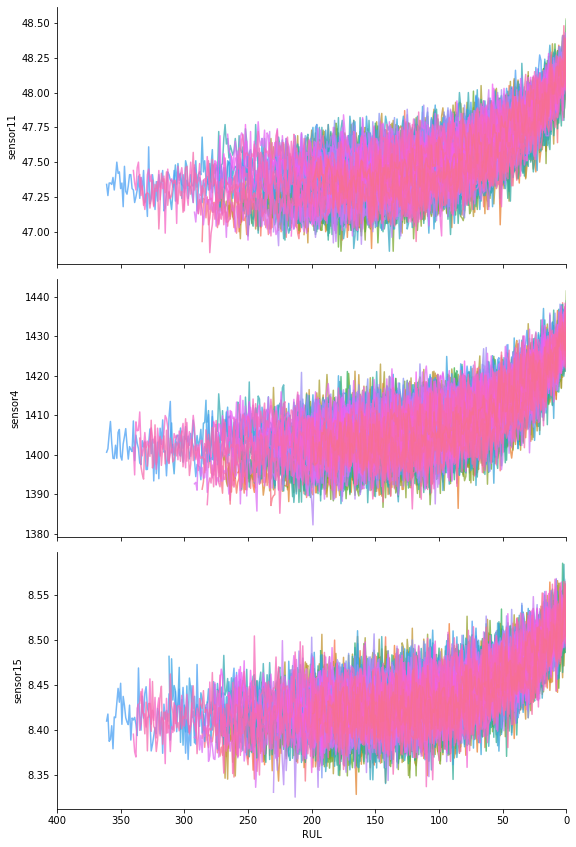

In [14]:
#3 variables negatively correlated with variable RUL
#sensor 11 (-0.7), sensor 4 (-0.68), sensor 15 (-0.64)
explore = sns.PairGrid(data=df.query('unit_number < 101') ,
                 x_vars=['RUL'],
                 y_vars=['sensor11', 'sensor4', 'sensor15'],
                 hue="unit_number", height=4, aspect=2)
explore = explore.map(plt.plot, alpha=0.75)
explore = explore.set(xlim=(400,0))

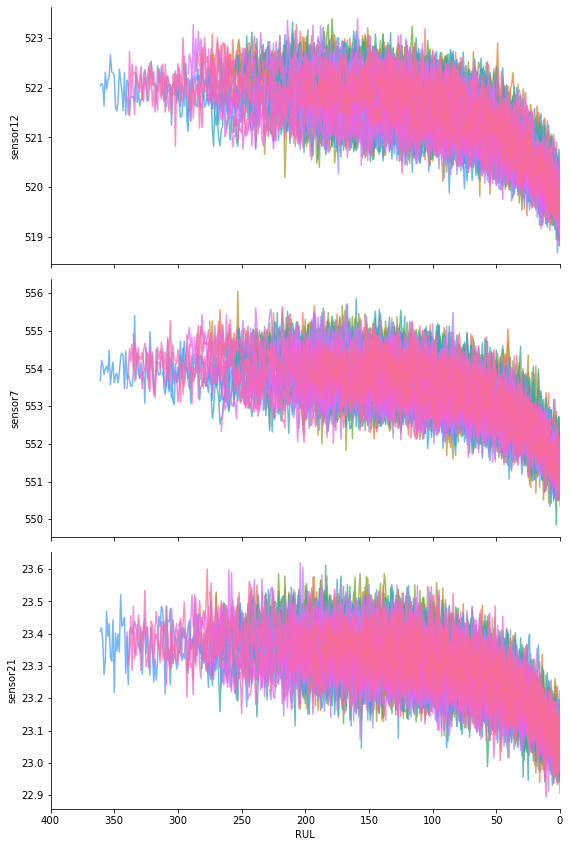

In [15]:
#3 variables positively correlated with variable RUL
#sensor 12 (0.67), sensor 7 (0.66), sensor 21 (0.64)
explore = sns.PairGrid(data=df.query('unit_number < 101') ,
                 x_vars=['RUL'],
                 y_vars=['sensor12', 'sensor7', 'sensor21'],
                 hue="unit_number", height=4, aspect=2)
explore = explore.map(plt.plot, alpha=0.75)
explore = explore.set(xlim=(400,0))

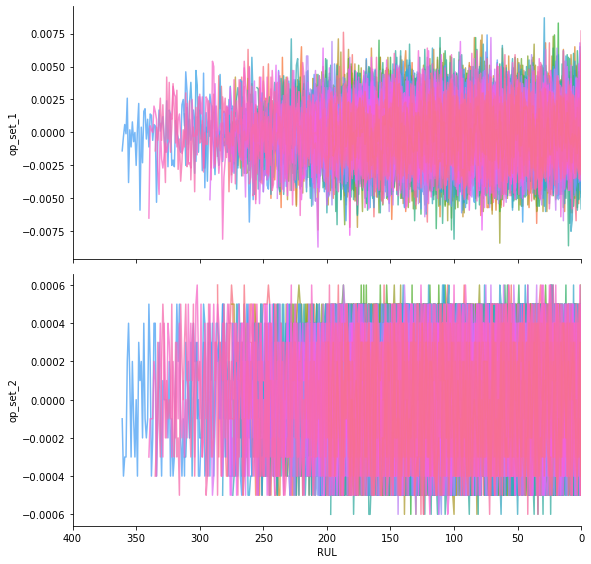

In [16]:
#variables uncorrelated with the variable RUL
#op_set_1 and op_set_2
explore = sns.PairGrid(data=df.query('unit_number < 101') ,
                 x_vars=['RUL'],
                 y_vars=['op_set_1', 'op_set_2'],
                 hue="unit_number", height=4, aspect=2)
explore = explore.map(plt.plot, alpha=0.75)
explore = explore.set(xlim=(400,0))

C:\Users\patza\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'RUL')]

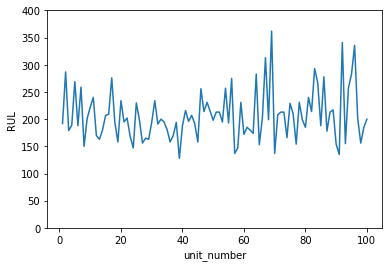

In [17]:
#maximum rul values for the explained variable 
ax = sns.lineplot(rul['unit_number'],rul['cycle'])
plt.ylim(0,400)
ax.set(ylabel = 'RUL')

In [18]:
print('Max RUL: ')
print(rul[rul['cycle'] == rul['cycle'].max()])
print('\n')
print('Min RUL: ')
print(rul[rul['cycle'] == rul['cycle'].min()])
print('\n')
print('Mean of RUL: ')
print(rul['cycle'].mean())
print('\n')
print('Standard deviation of RUL: ')
print(round(rul['cycle'].std(),2))

Max RUL: 
    unit_number  cycle
68           69    362


Min RUL: 
    unit_number  cycle
38           39    128


Mean of RUL: 
206.31


Standard deviation of RUL: 
46.34


# Data preparation and Modeling

In [19]:
#rejection from the dataset:
#unit_number - indicates unit number only, variable not related to engine operation
#cycle - there is a strong relationship between the rul variable and cycle, 
#but this variable describes the cycle number, it does not describe how the engine works
#op_set_1, op_set_2 - variables uncorrelated with rul
df.drop(['op_set_1', 'op_set_2'], axis=1, inplace=True)
df_with_unit_cycle = df.copy()
df.drop(['unit_number', 'cycle'], axis=1, inplace = True)

In [20]:
df1 = df.copy()
df1.head(3)

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189


array([[<AxesSubplot:title={'center':'RUL'}>]], dtype=object)

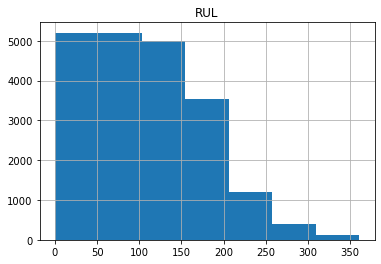

In [21]:
df1.hist(column = 'RUL', bins = 7)

In [22]:
#set of explanatory variables
X = df1.copy()
X.drop('RUL', axis=1, inplace=True)
X.head(3)

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442


In [23]:
#y - explained variable
y = df1['RUL'].values

In [24]:
#split the dataset into a training dataset and a test dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [25]:
#normalisation of the set X
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(x_train, y_train)

y_pred = reg.predict(x_test)

r2 = round(r2_score(y_test, y_pred),4)*100
mae = round(mean_absolute_error(y_test, y_pred),2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print(f'LINEAR REGRESSION /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')

y_pred = reg.predict(x_train)

r2 = round(r2_score(y_train, y_pred),4)*100
mae = round(mean_absolute_error(y_train, y_pred),2)
rmse = round(np.sqrt(mean_squared_error(y_train, y_pred)),2)
print(f'LINEAR REGRESSION /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

LINEAR REGRESSION /TEST/- r2: 57.16, mae: 34.02, rmse: 44.31
LINEAR REGRESSION /TRAIN/- r2: 58.17, mae: 34.18, rmse: 44.8


Text(0, 0.5, 'wartości przewidywane')

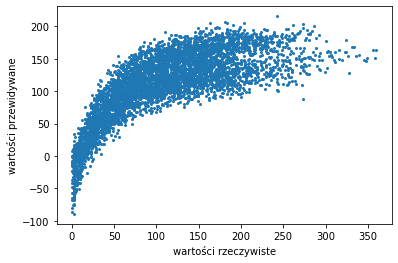

In [27]:
y_pred = reg.predict(x_test)
plt.scatter(y_test, y_pred, s = 4)
plt.xlabel("wartości rzeczywiste")
plt.ylabel("wartości przewidywane")

In [28]:
#linear regression with pca
for i in range(1,15):
    pca = PCA()
    X_train_pca = pca.fit_transform(x_train)
    lin_reg_pc = LinearRegression().fit(X_train_pca[:,:i], y_train)
    X_test_pca = pca.transform(x_test)[:,:i]
    y_pred = lin_reg_pc.predict(X_test_pca)
    print(i, round(r2_score(y_test, y_pred),3), round(mean_absolute_error(y_test, y_pred),2), round(np.sqrt(mean_squared_error(y_test, y_pred)),2))


1 0.538 35.33 46.02
2 0.57 34.08 44.39
3 0.57 34.08 44.39
4 0.571 34.08 44.36
5 0.571 34.08 44.36
6 0.571 34.07 44.36
7 0.571 34.07 44.35
8 0.572 34.03 44.31
9 0.572 34.02 44.3
10 0.572 34.01 44.3
11 0.572 34.01 44.3
12 0.572 34.01 44.3
13 0.572 34.01 44.3
14 0.572 34.02 44.31


In [29]:
print(np.round(pca.explained_variance_ratio_ * 100),2)
print(np.cumsum(np.round(pca.explained_variance_ratio_ * 100,2)))

[70.  8.  3.  3.  3.  2.  2.  2.  2.  2.  1.  1.  1.  0.] 2
[69.65 77.98 81.15 84.14 86.76 89.16 91.42 93.44 95.1  96.69 98.13 99.11
 99.88 99.99]


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

Text(0, 0.5, 'wartości przewidywane')

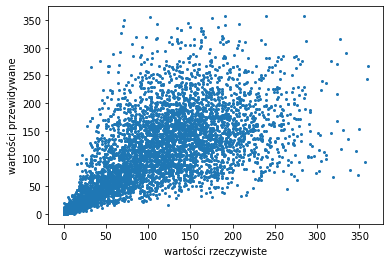

In [31]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
preds = model.predict(x_test)
plt.scatter(y_test, preds, s = 4)
plt.xlabel("wartości rzeczywiste")
plt.ylabel("wartości przewidywane")

In [32]:
for i in range(3,12):
    model = DecisionTreeRegressor(max_depth=i, min_samples_split=3, min_samples_leaf=4)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RANDOM FOREST depth: {i} /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

RANDOM FOREST depth: 3 /TRAIN/- r2: 0.5185947008783158, mae: 35.450696231344054, rmse: 46.97510893094584
RANDOM FOREST depth: 4 /TRAIN/- r2: 0.5434114681986806, mae: 33.93149516748617, rmse: 45.74828965054801
RANDOM FOREST depth: 5 /TRAIN/- r2: 0.5699880625236136, mae: 32.5717074466714, rmse: 44.396897134496086
RANDOM FOREST depth: 6 /TRAIN/- r2: 0.5757678020623511, mae: 32.22102392384776, rmse: 44.09752104273234
RANDOM FOREST depth: 7 /TRAIN/- r2: 0.5811588989831582, mae: 31.860313192991253, rmse: 43.81643190920424
RANDOM FOREST depth: 8 /TRAIN/- r2: 0.5801967206409536, mae: 31.697422585925523, rmse: 43.86673145839668
RANDOM FOREST depth: 9 /TRAIN/- r2: 0.5667913349874765, mae: 32.088117140265155, rmse: 44.561615806681985
RANDOM FOREST depth: 10 /TRAIN/- r2: 0.5451876875357804, mae: 32.658955815913444, rmse: 45.6592180099784
RANDOM FOREST depth: 11 /TRAIN/- r2: 0.5179457680610298, mae: 33.535729867966715, rmse: 47.006759417319095


Text(0, 0.5, 'wartości przewidywane')

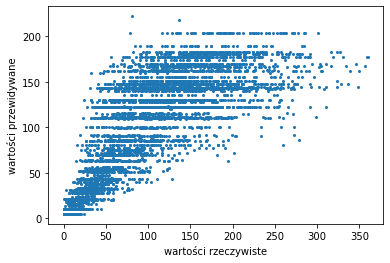

In [33]:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=3, min_samples_leaf=4)
model.fit(x_train, y_train)
preds = model.predict(x_test)
plt.scatter(y_test, preds, s = 4)
plt.xlabel("wartości rzeczywiste")
plt.ylabel("wartości przewidywane")

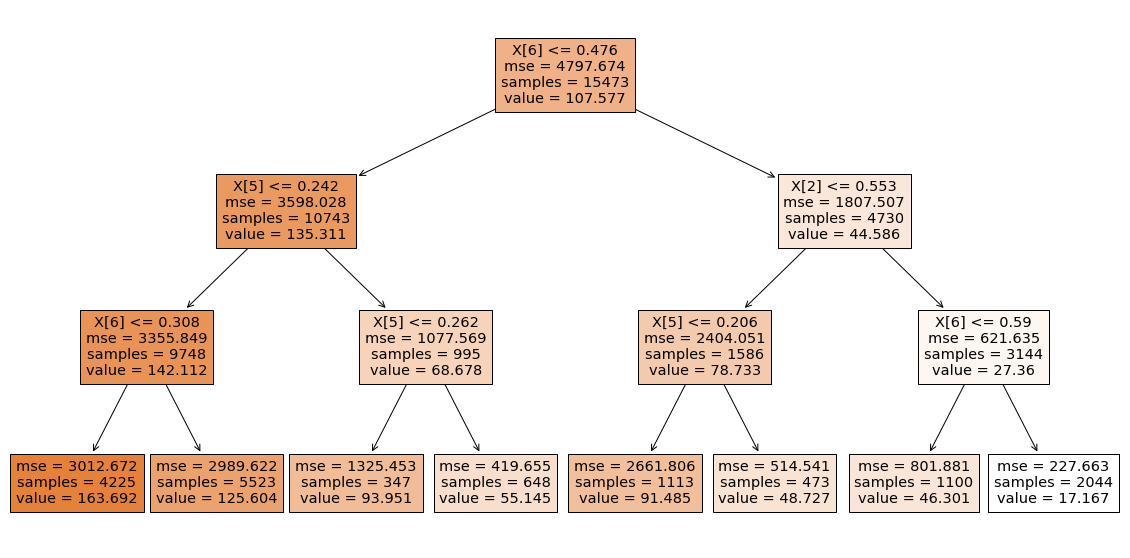

In [34]:
model = DecisionTreeRegressor(max_depth=3, min_samples_split=3, min_samples_leaf=4)
model.fit(x_train, y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, filled=True)

In [35]:
#CATBOOST
#XGBOOST
#LIGHGBM
#GRADIENTBOOST

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model = RandomForestRegressor(random_state = 42)
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'RANDOM FOREST /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'RANDOM FOREST /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

RANDOM FOREST /TEST/- r2: 0.6236620176679609, mae: 29.74491081814657, rmse: 41.5337733572848
RANDOM FOREST /TRAIN/- r2: 0.9488378595729035, mae: 10.983023977250696, rmse: 15.667140388920197


In [38]:
import shap

In [39]:
#explainer = shap.TreeExplainer(model)
#features = list(X.columns)
#shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train, feature_names = features)

In [40]:
import xgboost as xg

In [41]:
model = xg.XGBRegressor()
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'XGBOOST /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'XGBOOST /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

XGBOOST /TEST/- r2: 0.5829564491179955, mae: 31.393474580018776, rmse: 43.72230680883702
XGBOOST /TRAIN/- r2: 0.8579097112145181, mae: 18.426149706903537, rmse: 26.10944142496837


In [42]:
from catboost import CatBoostRegressor

In [43]:
#CatBoost
model = CatBoostRegressor(silent=True)
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'CatBoost /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'CatBoost /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

CatBoost /TEST/- r2: 0.6194237391609603, mae: 29.855805075319218, rmse: 41.7669930505737
CatBoost /TRAIN/- r2: 0.7791562070212119, mae: 23.226866514363902, rmse: 32.550523763115564


In [44]:
import lightgbm as ltb

In [45]:
model = ltb.LGBMClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'LIGHT GBM /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'LIGHT GBM /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

LIGHT GBM /TEST/- r2: -0.1591344731901818, mae: 53.12020162853819, rmse: 72.89190050059472
LIGHT GBM /TRAIN/- r2: -0.12273120283981731, mae: 53.41679053835714, rmse: 73.39276991033574


In [46]:
from sklearn.ensemble import AdaBoostRegressor

In [47]:
model = AdaBoostRegressor()
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'ADA BOOST /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'ADA BOOST /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

ADA BOOST /TEST/- r2: 0.4964887995900109, mae: 38.364279491336156, rmse: 48.041541099699174
ADA BOOST /TRAIN/- r2: 0.5348580370397135, mae: 37.423321900653725, rmse: 47.23981008701062


In [48]:
#feature engineering

In [49]:
rul_dict = dict(zip(rul['unit_number'],rul['cycle']))
df_with_ma5 = df_with_unit_cycle.copy()
columns = ['cycle', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21','RUL' ]

In [50]:
for unit in rul_dict:
    i = 5
    temp = df_with_ma5[df_with_ma5['unit_number']==unit]
    while i < rul_dict[unit]:
        #print(unit)
        while i < rul_dict[unit]:
            #print(i)
            for col in columns:
                df_with_ma5.loc[df_with_ma5['cycle']== i, col+"_MA5"] = df_with_ma5[col].transform(lambda x: x.rolling(5,5).mean())
            i += 5

#df_with_ma5.drop(columns, axis=1, inplace = True)
df_with_ma5.dropna(inplace = True)
df_with_ma5 = df_with_ma5.reset_index(drop = True)

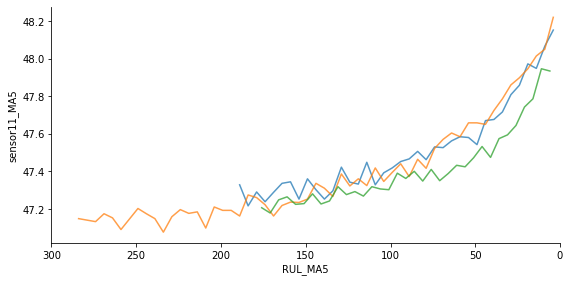

In [51]:
explore = sns.PairGrid(data=df_with_ma5.query('unit_number < 4') ,
                 x_vars=['RUL_MA5'],
                 y_vars=['sensor11_MA5'],
                 hue="unit_number", height=4, aspect=2)
explore = explore.map(plt.plot, alpha=0.75)
explore = explore.set(xlim=(300,0))

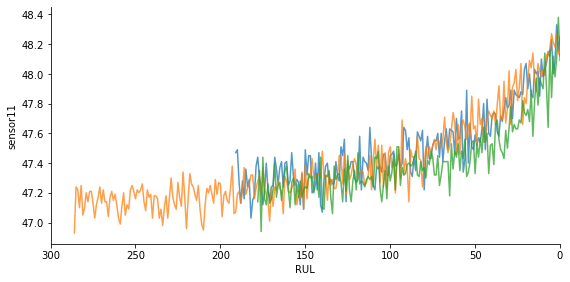

In [52]:
explore = sns.PairGrid(data=df_with_unit_cycle.query('unit_number < 4') ,
                 x_vars=['RUL'],
                 y_vars=['sensor11'],
                 hue="unit_number", height=4, aspect=2)
explore = explore.map(plt.plot, alpha=0.75)
explore = explore.set(xlim=(300,0))

In [53]:
df_with_ma5.drop(['RUL', 'cycle', 'unit_number', 'cycle_MA5'], axis=1, inplace=True)

In [54]:
df_with_ma5.columns

Index(['sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17',
       'sensor20', 'sensor21', 'sensor2_MA5', 'sensor3_MA5', 'sensor4_MA5',
       'sensor7_MA5', 'sensor8_MA5', 'sensor9_MA5', 'sensor11_MA5',
       'sensor12_MA5', 'sensor13_MA5', 'sensor14_MA5', 'sensor15_MA5',
       'sensor17_MA5', 'sensor20_MA5', 'sensor21_MA5', 'RUL_MA5'],
      dtype='object')

In [55]:
order_of_columns = ['sensor2', 'sensor3', 'sensor4', 'sensor7',
       'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14',
       'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_MA5', 'sensor3_MA5', 'sensor4_MA5', 'sensor7_MA5',
       'sensor8_MA5', 'sensor9_MA5', 'sensor11_MA5', 'sensor12_MA5',
       'sensor13_MA5', 'sensor14_MA5', 'sensor15_MA5', 'sensor17_MA5',
       'sensor20_MA5', 'sensor21_MA5', 'RUL_MA5']

In [56]:
df_with_ma5 = df_with_ma5[order_of_columns]

In [57]:
df_with_ma5

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,...,sensor9_MA5,sensor11_MA5,sensor12_MA5,sensor13_MA5,sensor14_MA5,sensor15_MA5,sensor17_MA5,sensor20_MA5,sensor21_MA5,RUL_MA5
0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,...,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958,23.39302,189.0
1,641.71,1591.24,1400.46,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,...,9049.554,47.216,522.010,2388.040,8130.262,8.40344,391.8,39.010,23.38618,184.0
2,642.43,1583.82,1402.13,553.64,2388.11,9052.22,47.30,522.50,2388.08,8127.56,...,9049.078,47.290,521.844,2388.038,8132.984,8.41186,392.0,39.020,23.37060,179.0
3,643.04,1581.11,1405.23,554.81,2388.05,9045.90,47.22,522.07,2388.02,8129.71,...,9050.740,47.238,521.820,2388.046,8132.990,8.42074,391.8,38.900,23.39080,174.0
4,642.77,1594.10,1399.39,554.00,2388.02,9054.16,47.36,522.56,2388.02,8136.61,...,9050.712,47.288,522.126,2388.042,8132.564,8.40262,392.2,38.980,23.38878,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,643.64,1595.98,1416.45,552.05,2388.24,9062.98,47.77,520.80,2388.22,8138.98,...,9067.278,47.920,520.402,2388.188,8140.326,8.49564,395.4,38.554,23.15308,22.0
4082,643.95,1600.81,1420.34,551.92,2388.19,9069.95,47.75,520.71,2388.20,8142.32,...,9065.826,47.894,520.374,2388.214,8141.796,8.50344,395.6,38.492,23.14256,17.0
4083,643.12,1594.45,1426.04,551.06,2388.21,9064.74,47.99,519.52,2388.26,8142.28,...,9066.902,48.074,519.962,2388.240,8140.114,8.49336,395.4,38.522,23.10454,12.0
4084,643.41,1600.04,1431.90,551.42,2388.23,9069.69,48.22,519.71,2388.28,8142.90,...,9067.092,48.156,519.952,2388.236,8142.322,8.52284,396.0,38.388,23.10930,7.0


In [58]:
#set of explanatory variables
X_ma5 = df_with_ma5.copy()
X_ma5.drop('RUL_MA5', axis=1, inplace=True)
X_ma5.head(3)

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,...,sensor8_MA5,sensor9_MA5,sensor11_MA5,sensor12_MA5,sensor13_MA5,sensor14_MA5,sensor15_MA5,sensor17_MA5,sensor20_MA5,sensor21_MA5
0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,...,2388.070,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958,23.39302
1,641.71,1591.24,1400.46,553.59,2388.05,9051.70,47.03,521.79,2388.06,8129.38,...,2388.028,9049.554,47.216,522.010,2388.040,8130.262,8.40344,391.8,39.010,23.38618
2,642.43,1583.82,1402.13,553.64,2388.11,9052.22,47.30,522.50,2388.08,8127.56,...,2388.092,9049.078,47.290,521.844,2388.038,8132.984,8.41186,392.0,39.020,23.37060


In [59]:
#y - explained variable
y_ma5 = df_with_ma5['RUL_MA5'].values

In [60]:
#split the dataset into a training dataset and a test dataset
x_train_ma5, x_test_ma5, y_train_ma5, y_test_ma5 = train_test_split(X_ma5, y_ma5, test_size=0.25, random_state = 42)

In [61]:
#normalisation of the set X
scaler = MinMaxScaler()
x_train_ma5 = scaler.fit_transform(x_train_ma5)
x_test_ma5 = scaler.transform(x_test_ma5)

In [62]:
model = RandomForestRegressor(max_depth=5)
model.fit(x_train_ma5, y_train_ma5)
preds = model.predict(x_test_ma5)
r2 = r2_score(y_test_ma5, preds)
mae = mean_absolute_error(y_test_ma5, preds)
rmse = np.sqrt(mean_squared_error(y_test_ma5, preds))
print(f'RANDOM FOREST /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train_ma5)
r2 = r2_score(y_train_ma5, preds)
mae = mean_absolute_error(y_train_ma5, preds)
rmse = np.sqrt(mean_squared_error(y_train_ma5, preds))
print(f'RANDOM FOREST /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

RANDOM FOREST /TEST/- r2: 0.6641004928653038, mae: 28.29968380584025, rmse: 39.512053075745335
RANDOM FOREST /TRAIN/- r2: 0.6874801268211062, mae: 26.649504102591006, rmse: 38.25745066589932


In [63]:
import shap

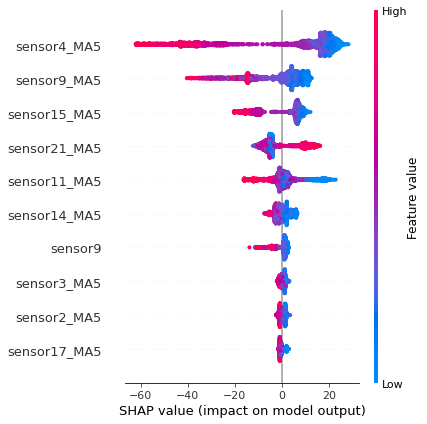

In [64]:
explainer = shap.TreeExplainer(model)
features = list(X_ma5.columns)
shap_values = explainer.shap_values(x_train_ma5)
shap.summary_plot(shap_values, x_train_ma5, feature_names = features, max_display = 10, plot_size = (6,6))

In [65]:
model = RandomForestRegressor(max_depth=5)
model.fit(x_train, y_train)
preds = model.predict(x_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'RANDOM FOREST /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train)
r2 = r2_score(y_train, preds)
mae = mean_absolute_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train, preds))
print(f'RANDOM FOREST /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

RANDOM FOREST /TEST/- r2: 0.6017645032435012, mae: 31.10103370308288, rmse: 42.725027089567256
RANDOM FOREST /TRAIN/- r2: 0.6236424786292908, mae: 30.403452986012507, rmse: 42.49283257729521


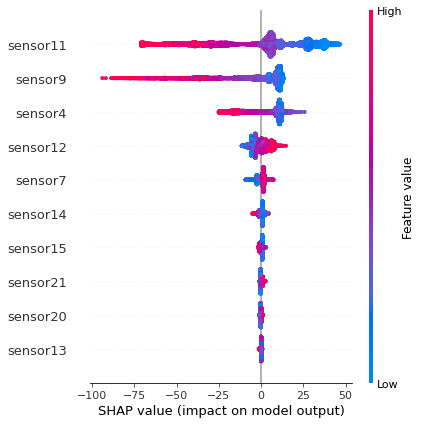

In [66]:
explainer = shap.TreeExplainer(model)
features = list(X.columns)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names = features, max_display = 10, plot_size = (6,6))

In [67]:
#hyperparameter tuning

In [69]:
from sklearn.neural_network import MLPRegressor

In [130]:
model = MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter= 800, random_state = 42)
model.fit(x_train, y_train)
preds_test = model.predict(x_test)
r2 = r2_score(y_test, preds_test)
mae = mean_absolute_error(y_test, preds_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_test))
print(f'MLPRegressor /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds_train = model.predict(x_train)
r2 = r2_score(y_train, preds_train)
mae = mean_absolute_error(y_train, preds_train)
rmse = np.sqrt(mean_squared_error(y_train, preds_train))
print(f'MLPRegressor /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')

MLPRegressor /TEST/- r2: 0.6376581761832657, mae: 28.763217330811308, rmse: 40.754127104152445
MLPRegressor /TRAIN/- r2: 0.6505182127501221, mae: 28.424796512621782, rmse: 40.94752496379594


Text(0, 0.5, 'wartości przewidywane')

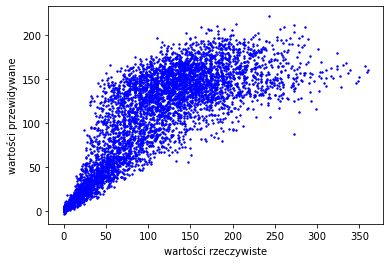

In [131]:
plt.scatter(y_test, preds_test, alpha = 1, color = 'blue', s = 2)
#plt.scatter(y_train, preds_train, alpha= 0.1, color = 'green', s= 2)
plt.xlabel("wartości rzeczywiste")
plt.ylabel("wartości przewidywane")

In [145]:
model = MLPRegressor( hidden_layer_sizes=(150, 100, 50), max_iter = 800, random_state =42 )
model.fit(x_train_ma5, y_train_ma5)
preds_test = model.predict(x_test_ma5)
r2 = r2_score(y_test_ma5, preds_test)
mae = mean_absolute_error(y_test_ma5, preds_test)
rmse = np.sqrt(mean_squared_error(y_test_ma5, preds_test))
print(f'MLPRegressor /TEST/- r2: {r2}, mae: {mae}, rmse: {rmse}')
preds = model.predict(x_train_ma5)
r2 = r2_score(y_train_ma5, preds)
mae = mean_absolute_error(y_train_ma5, preds)
rmse = np.sqrt(mean_squared_error(y_train_ma5, preds))
print(f'MLPRegressor /TRAIN/- r2: {r2}, mae: {mae}, rmse: {rmse}')


MLPRegressor /TEST/- r2: 0.6690470329173663, mae: 27.63586314927246, rmse: 39.22004184888458
MLPRegressor /TRAIN/- r2: 0.664290506786144, mae: 27.575430528419545, rmse: 39.651444968847265


Text(0, 0.5, 'wartości przewidywane')

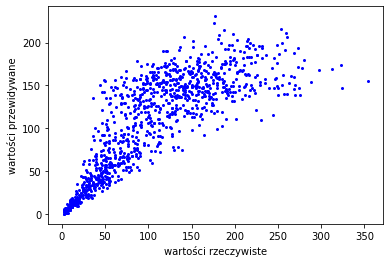

In [146]:
plt.scatter(y_test_ma5, preds_test, alpha = 1, color = 'blue', s = 4)
#plt.scatter(y_train, preds_train, alpha= 0.1, color = 'green', s= 2)
plt.xlabel("wartości rzeczywiste")
plt.ylabel("wartości przewidywane")